In [2]:
from google.colab import files
import pandas as pd
import io

# Ini akan memunculkan tombol untuk pilih file dari komputer
uploaded = files.upload()

# Membaca file yang dipilih
df = pd.read_csv(io.BytesIO(uploaded['silver_prices_data.csv']))

print("Data berhasil dimuat!")
df.head()

Saving silver_prices_data.csv to silver_prices_data.csv
Data berhasil dimuat!


,Date,Close,High,Low,Open,Volume
0,2011-01-24,27.318001,27.459999,26.955000,27.174999,168
1,2011-01-25,26.811001,26.950001,26.565001,26.915001,77
2,2011-01-26,27.132000,27.025000,26.684999,27.025000,49
3,2011-01-27,27.045000,27.684999,27.410000,27.684999,184
4,2011-01-28,27.934000,27.950001,26.504999,26.695000,64


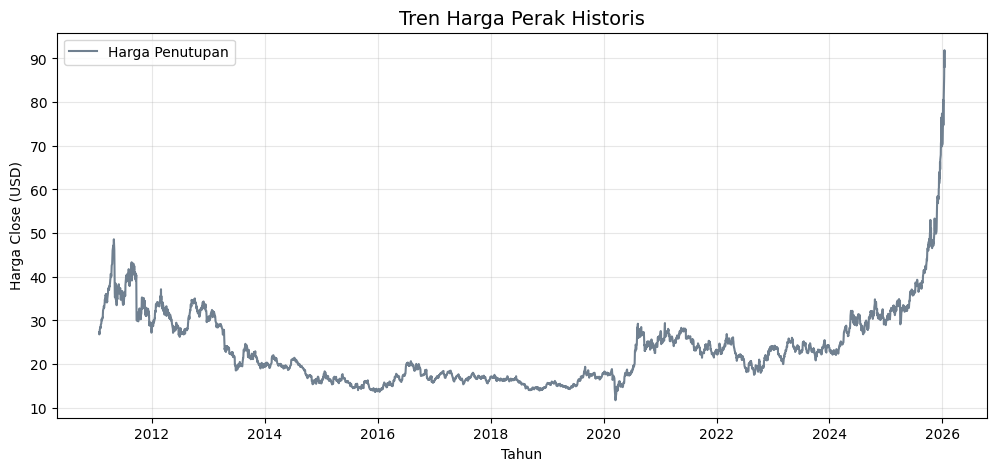

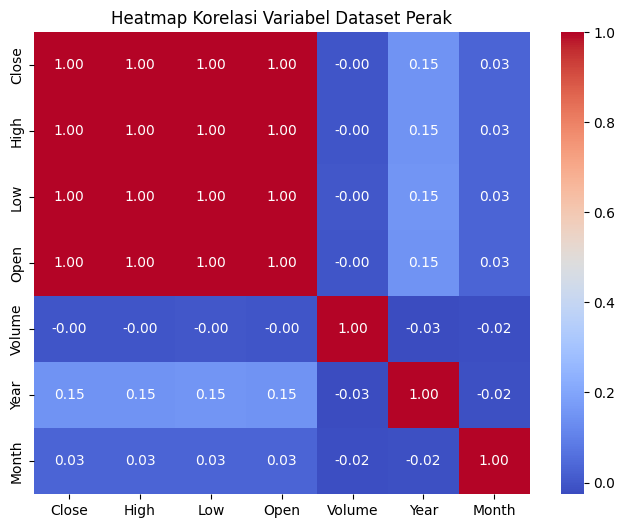

/tmp/ipython-input-3580471387.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Close', data=df[df['Year'].isin([2021, 2022])], palette='Set3')


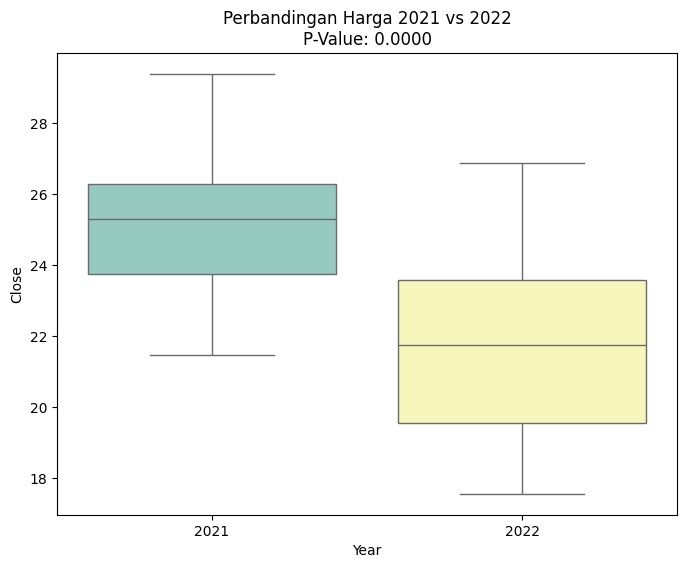

Hasil Uji Signifikansi (P-Value): 2.7324904495483386e-58


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. MEMUAT DATA
# Pastikan file silver_prices_data.csv sudah diupload ke folder yang sama
df = pd.read_csv('silver_prices_data.csv')

# Konversi kolom Date dan buat fitur tambahan
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df = df.sort_values('Date')

# --- [3] ANALISIS DATA EKSPLORATIF (EDA) ---
# Visualisasi Tren Harga Penutupan
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], color='slategray', label='Harga Penutupan')
plt.title('Tren Harga Perak Historis', fontsize=14)
plt.xlabel('Tahun')
plt.ylabel('Harga Close (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Visualisasi Korelasi antar variabel numerik
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Variabel Dataset Perak')
plt.show()

# --- [7] PENGUJIAN HIPOTESIS & SIGNIFIKANSI ---
# Hipotesis: Apakah ada perbedaan harga signifikan antara Tahun 2021 dan 2022?
data_2021 = df[df['Year'] == 2021]['Close']
data_2022 = df[df['Year'] == 2022]['Close']

# Uji T (Independent T-Test)
t_stat, p_val = stats.ttest_ind(data_2021, data_2022, nan_policy='omit')

# Visualisasi Boxplot untuk mendukung hipotesis
plt.figure(figsize=(8, 6))
sns.boxplot(x='Year', y='Close', data=df[df['Year'].isin([2021, 2022])], palette='Set3')
plt.title(f'Perbandingan Harga 2021 vs 2022\nP-Value: {p_val:.4f}')
plt.show()

print(f"Hasil Uji Signifikansi (P-Value): {p_val}")